In [0]:
pip install geopy

In [0]:
import tweepy
from tweepy import OAuthHandler

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from geopy.geocoders import Nominatim

In [0]:
import datetime

In [0]:
import re

In [0]:
import pandas as pd
import numpy as np
import csv

In [0]:
import operator 
from textblob import TextBlob
from collections import Counter

In [0]:
import nltk

In [0]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk import bigrams

In [0]:
date = datetime.datetime.utcnow().date()

In [0]:
# Twittter App Credentials
consumer_key = "A0lPFhv6c1twbEz8BY4r4TfOb"
consumer_secret = "zQXzmROzedXF9UaoV18siNc7ftNhXMrBXK8uAC4F54fdDfWbbh"
access_token = "1179780108988477440-5DySAvAMwAemnn5UmvXsFIJW3It8Av"
access_token_secret = "k8dQUxpIdLAuWeWzBYtP3xYfumvkjbmNynDCG7CEjVNQW"

In [0]:
# Calling API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, 
				   wait_on_rate_limit_notify=True)

NameError: ignored

# Preprocessing the data

In [0]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [0]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [0]:
hashtag_re = re.compile("(?:^|\s)[＃#]{1}(\w+)", re.UNICODE)
mention_re = re.compile("(?:^|\s)[＠ @]{1}([^\s#<>[\]|{}]+)", re.UNICODE)
link_re = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', re.VERBOSE | re.IGNORECASE)

In [0]:
def tokenize(s):
    return tokens_re.findall(s)

In [0]:
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [0]:
punctuation = list(string.punctuation)
stop_words = set(stopwords.words('english')+ punctuation + ['rt', 'via'])

def clean_tweets(tweet):
    
    tweet = re.sub(r'‚Ä¶', '', tweet)

    tweet = re.sub(r'(?:^|\s)[＠ @]{1}([^\s#<>[\]|{}]+)', '',tweet)
    
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    
    tweet = emoji_pattern.sub(r'', tweet)
    
    tweet = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+','', tweet)
    
    tweet = re.sub(r':', '', tweet)
       
    word_tokens = word_tokenize(tweet)  
    
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    
    filtered_tweet = []
    
    for w in word_tokens:
        
        if w not in stop_words and w not in emoticons:
            
            filtered_tweet.append(w)
            
    return ' '.join(filtered_tweet)

In [0]:
def check_date(tweets_date):     
    
    tweet_date=datetime.datetime.strptime(tweets_date, '%a %b %d %H:%M:%S +0000 %Y').strftime('%d/%m/%Y %H:%M:%S')

    tweet_date=datetime.datetime.strptime(tweet_date, '%d/%m/%Y %H:%M:%S')
    
    current_time = datetime.datetime.utcnow()

    date = ((int(current_time.hour)*60) + int(current_time.minute)) - ((int(tweet_date.hour)*60) + int(tweet_date.minute) )

    if date <= 9 :
        
        return 1
    
    else:
        
        return 0

        

# Getting the data

In [0]:
# Provide the keyword eg: corona
keyword = input('Enter the keyword: ')

Enter the keyword: corona


In [0]:
# Fetching tweets

tweet=[]

for status in tweepy.Cursor(api.search,q = keyword, count=100, lang='en', exclude='retweets', since=str(date)).items(1000):
    
    is_past_10_min=check_date(status._json['created_at'])

    if is_past_10_min == 1:
        tweet.append(status._json)
    else:
        break




In [0]:
df = pd.DataFrame(columns=[ 'Tweet_date','Author','Text', 'Text_Filtered','Hashtags' , 'Mentions', 'Links','Retweet_Count','Favorite_Count','Polarity', 'Subjectivity','Sentiment','Location'])


In [0]:
df.head()

,Tweet_date,Author,Text,Text_Filtered,Hashtags,Mentions,Links,Retweet_Count,Favorite_Count,Polarity,Subjectivity,Sentiment,Location


In [0]:
text_filtered=[]
text=[]
hashtags =[]
mentions =[]
links = []
location = []
author = []
tweetdate = []
retweet =[]
favorite =[]




In [0]:
for data in tweet:
    
    hashtags.append(hashtag_re.findall(data['text']))

    mentions.append(mention_re.findall(data['text']))
    
    links.append(link_re.findall(data['text']))

    text_filtered.append(clean_tweets(data['text']))
    
    text.append(data['text'])
    
    tweetdate.append(datetime.datetime.strptime(data['created_at'], '%a %b %d %H:%M:%S +0000 %Y').strftime('%d/%m/%Y %H:%M:%S'))
    
    retweet.append(data['retweet_count'])
    
    favorite.append(data['favorite_count'])
    
    author.append(data['user']['screen_name'])

    try:
        location.append(data['user']['location'])
    except:
        location.append(None)


In [0]:
df['Hashtags']=hashtags
df['Text_Filtered']=text_filtered
df['Text']=text
df['Mentions']=mentions
df['Links'] = links
df['Author'] = author
df['Tweet_date'] = tweetdate
df['Retweet_Count'] = retweet
df['Favorite_Count'] = favorite
df['Location'] = location

In [0]:
df

,Tweet_date,Author,Text,Text_Filtered,Hashtags,Mentions,Links,Retweet_Count,Favorite_Count,Polarity,Subjectivity,Sentiment,Location
0,08/05/2020 03:36:45,CBV996,@corona_crasher We can clean the earth brother.,We clean earth brother,[],[corona_crasher],[],0,0,NaN,NaN,NaN,Western Deep Shaft no.4
1,08/05/2020 03:36:43,Sukdaboy,@Akshaye30 @DDNewsGujarati @DDNewslive @DDIndi...,Corona like seriously,[],"[Akshaye30, DDNewsGujarati, DDNewslive, DDIndi...",[https://t.co/odtsudlJcN],0,0,NaN,NaN,NaN,
2,08/05/2020 03:36:40,CallMeAdah,I hope you guys are handling your money smartl...,I hope guys handling money smartly know corona...,[],[],[],0,0,NaN,NaN,NaN,"New York, USA"
3,08/05/2020 03:36:39,neshwesh,One thing for sure corona made me focus back o...,One thing sure corona made focus back Pure Can...,[],[],[https://t.co/x4eS0saNRv],0,0,NaN,NaN,NaN,"ÜT: 37.707099,-89.222919"
4,08/05/2020 03:36:38,abbeyfx2,If only world was having an issue with weak er...,If world issue weak erection Corona Nigeria wo...,[],[],[],0,0,NaN,NaN,NaN,Lagos-Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,08/05/2020 03:27:05,airnewsalerts,No corona positive case reported from 13 state...,No corona positive case reported 13 states UTs...,[IndiaFightsCorona],[],[https://t.co/cL9bD0fdf6],7,67,NaN,NaN,NaN,"New Delhi, India"
446,08/05/2020 03:27:03,KahnuCharanSwa6,@sandipsabharwal @IndianExpress Modi governmen...,Modi government entered lockdown right time as...,[],"[sandipsabharwal, IndianExpress]",[https://t.co/mN8Jr1oszC],0,0,NaN,NaN,NaN,"Hyderabad, India"
447,08/05/2020 03:27:01,tinyhongsang,When you work hard so you can play hard but co...,When work hard play hard corona cancelled play...,[],[],[https://t.co/K4jJp7pwmG],0,0,NaN,NaN,NaN,Hongsang
448,08/05/2020 03:27:01,advocatesarin,@EconomicTimes Maharashtra Govt playing very d...,Maharashtra Govt playing dangerous game They t...,[],[EconomicTimes],[https://t.co/i2QJbicijt],0,0,NaN,NaN,NaN,"New Delhi, India"


# Sentiment Analysis

In [0]:
count=0
polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0

In [0]:
for row in df.index:
    
    count += 1
    
    analysis = TextBlob(df['Text_Filtered'][row])    
        
    df.loc[row,'Polarity'] = analysis.sentiment.polarity
    
    df.loc[row,'Subjectivity'] = analysis.sentiment.subjectivity
    
    polarity += analysis.sentiment.polarity
        
    if (analysis.sentiment.polarity == 0):
        
        sentiment = "neutral"
        
        neutral += 1
        
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        
        wpositive += 1
        
        sentiment = "weakly positive"
        
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        
        positive += 1
        
        sentiment = "positive"
        
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        
        spositive += 1
        
        sentiment = "strongly positive"
        
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
        
        wnegative += 1
        
        sentiment = "weakly negative"
        
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
        
        negative += 1
        
        sentiment = "negative"
        
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
        
        snegative += 1
        
        sentiment = "strongly negative"        
        
        
        
    df.loc[row,'Sentiment'] = sentiment


In [0]:
df

,Tweet_date,Author,Text,Text_Filtered,Hashtags,Mentions,Links,Retweet_Count,Favorite_Count,Polarity,Subjectivity,Sentiment,Location
0,08/05/2020 03:36:45,CBV996,@corona_crasher We can clean the earth brother.,We clean earth brother,[],[corona_crasher],[],0,0,0.366667,0.7,positive,Western Deep Shaft no.4
1,08/05/2020 03:36:43,Sukdaboy,@Akshaye30 @DDNewsGujarati @DDNewslive @DDIndi...,Corona like seriously,[],"[Akshaye30, DDNewsGujarati, DDNewslive, DDIndi...",[https://t.co/odtsudlJcN],0,0,-0.333333,0.666667,negative,
2,08/05/2020 03:36:40,CallMeAdah,I hope you guys are handling your money smartl...,I hope guys handling money smartly know corona...,[],[],[],0,0,0.357143,0.571429,positive,"New York, USA"
3,08/05/2020 03:36:39,neshwesh,One thing for sure corona made me focus back o...,One thing sure corona made focus back Pure Can...,[],[],[https://t.co/x4eS0saNRv],0,0,0.238095,0.462963,weakly positive,"ÜT: 37.707099,-89.222919"
4,08/05/2020 03:36:38,abbeyfx2,If only world was having an issue with weak er...,If world issue weak erection Corona Nigeria wo...,[],[],[],0,0,-0.375,0.625,negative,Lagos-Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,08/05/2020 03:27:05,airnewsalerts,No corona positive case reported from 13 state...,No corona positive case reported 13 states UTs...,[IndiaFightsCorona],[],[https://t.co/cL9bD0fdf6],7,67,-0.0742424,0.498485,weakly negative,"New Delhi, India"
446,08/05/2020 03:27:03,KahnuCharanSwa6,@sandipsabharwal @IndianExpress Modi governmen...,Modi government entered lockdown right time as...,[],"[sandipsabharwal, IndianExpress]",[https://t.co/mN8Jr1oszC],0,0,0.285714,0.535714,weakly positive,"Hyderabad, India"
447,08/05/2020 03:27:01,tinyhongsang,When you work hard so you can play hard but co...,When work hard play hard corona cancelled play...,[],[],[https://t.co/K4jJp7pwmG],0,0,-0.291667,0.541667,weakly negative,Hongsang
448,08/05/2020 03:27:01,advocatesarin,@EconomicTimes Maharashtra Govt playing very d...,Maharashtra Govt playing dangerous game They t...,[],[EconomicTimes],[https://t.co/i2QJbicijt],0,0,-0.5,0.65,negative,"New Delhi, India"


# Word Cloud From the Tweets fetched

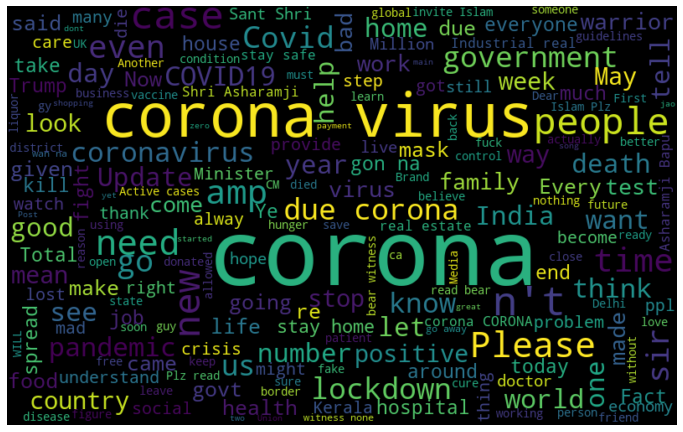

In [0]:

#'Tweet_date','Author','Text', 'Text_Filtered','Hashtags' , 'Mentions', 'Links','Retweet_Count','Favorite_Count','Polarity', 'Subjectivity','Sentiment','Location'
allWords = ' '.join([twts for twts in df['Text_Filtered']])
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(12,9))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
def time_bins(time_value):
  x=datetime.datetime.strptime(time_value,'%d/%m/%Y %H:%M:%S')
  time_min = x.minute
  return time_min


In [0]:
df['Minute'] = df['Tweet_date'].apply(time_bins)

In [0]:
x=df.groupby(['Minute','Sentiment']).count()['Text']
def count_tweets_min(row):
  min = row['Minute']
  sentiment = row['Sentiment']
  return x.get(key=min).get(key=sentiment)

df['Total_tweets_in_min'] = df.apply(count_tweets_min,axis=1)

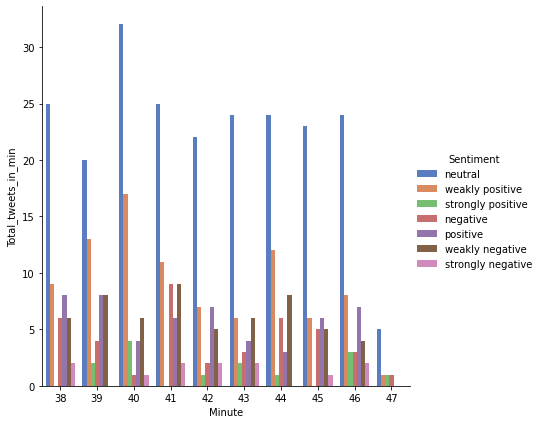

In [0]:
sns.catplot(x='Minute', y='Total_tweets_in_min', hue="Sentiment", data=df,
                height=6, kind="bar", palette="muted")

# Finding the Latitude and Longitude of the place

In [0]:

def geocode(city, recursion=0):
    try:
        return geolocator.geocode(city)
    except GeocoderTimedOut as e:
        if recursion > 10:      # max recursions
            raise e

        time.sleep(1) # wait a bit
        # try again
        return geocode(city, recursion=recursion + 1)

In [0]:
geolocator = Nominatim(user_agent="find_longitude_latitude")

def latitude_longitude(location, timeout=None):
  location = geocode(location)
  if type(location) == type(geolocator.geocode('Mumbei')):
    return 'Null'
  else:
    return [location.latitude,location.longitude]

In [0]:
df_map=df[df['Location']!=None]

In [0]:
df_map['Latitude_longitude']=np.zeros(df_map.shape[0])

In [0]:
df_map['Latitude_Longitude'] = df_map['Location'].apply(latitude_longitude)


In [0]:
df_map= df_map[df_map['Latitude_Longitude']!='Null']

In [0]:
def lat(location):
  return location[0]
def lon(location):
  return location[1]

In [0]:
df_map['lat'] = df_map['Latitude_Longitude'].apply(lat)
df_map['lon'] = df_map['Latitude_Longitude'].apply(lon)

In [0]:
import plotly.express as px 

fig = px.scatter_mapbox(df_map, lat="lat", lon="lon", color="Sentiment")
fig.update_layout(mapbox_style="open-street-map") 
fig.show()